# Использование SymPy в качестве калькулятора

SymPy поддерживает три типа численных данных: Float, Rational и Integer.

Rational представляет собой обыкновенную дробь, которая задается с помощью двух целых чисел: числителя и знаменателя. Например, Rational(1, 2) представляет дробь 1/2, Rational(5, 2) представляет дробь 5/2, и так далее.


In [1]:
from sympy import Rational
a = Rational(1, 2)

In [2]:
a

1/2

In [3]:
a*2

1

In [4]:
Rational(2)**50/Rational(10)**50

1/88817841970012523233890533447265625

In [5]:
1/2

0.5

Обратите внимание, что в случае деления мы имеем дело не с объектом Number из библиотеки SymPy, который представляет число в SymPy, а с питоновскими числами, которые создаются самим интерпретатором Python. Скорее всего, вам нужно будете работать с дробными числами из библиотеки SymPy, поэтому для того чтобы получать результат в виде объектов SymPy убедитесь, что вы используете класс Rational. Кому-то может показаться удобным обозначать Rational как R:

In [6]:
R = Rational
R(1, 2)

1/2

In [7]:
R(1)/2 # R(1) is a SymPy Integer and Integer/int gives a Rational

1/2

В модуле Sympy имеются особые константы, такие как e и pi, которые ведут себя как переменные (то есть выражение 1 + pi не преобразуется сразу в число, а так и останется 1 + pi):

In [8]:
from sympy import pi, E
pi**2

pi**2

In [9]:
pi.evalf()

3.14159265358979

In [10]:
(pi + E).evalf()

5.85987448204884

как вы видите, функция evalf переводит исходное выражение в число с плавающей точкой. Вычисления можно проводить с большей точностью. Для этого нужно передать в качестве аргумента этой функции требуемое число десятичных знаков.

Для работы с математической бесконечностью используется символ oo:

In [11]:
from sympy import oo
oo > 99999

True

In [12]:
oo + 1

oo

# Переменные

В отличие от многих других систем компьютерной алгебры, вам нужно явно декларировать символьные переменные:

In [13]:
from sympy import Symbol
x = Symbol('x')
y = Symbol('y')

В левой части этого выражения находится переменная Python, которая питоновским присваиванием соотносится с объектом класса Symbol из SymPy.

In [14]:
from sympy.abc import x, theta

Символьные переменные могут также задаваться и с помощью функций symbols или var. Они допускают указание диапазона. Их отличие состоит в том, что var добавляет созданные переменные в текущее пространство имен:

In [15]:
from sympy import symbols, var
a, b, c = symbols('a,b,c')
d, e, f = symbols('d:f')
var('g:h')

(g, h)

In [16]:
var('g:2')

(g0, g1)

Экземпляры класса Symbol взаимодействуют друг с другом. Таким образом, с помощью них конструируются алгебраические выражения:

In [17]:
x + y + x - y

2*x

In [18]:
(x + y)**2

(x + y)**2

In [19]:
((x + y)**2).expand()

x**2 + 2*x*y + y**2

Переменные могут быть заменены на другие переменные, числа или выражения с помощью функции подстановки subs(old, new):

In [20]:
((x + y)**2).subs(x, 1)

(y + 1)**2

In [21]:
((x + y)**2).subs(x, y)

4*y**2

In [22]:
((x + y)**2).subs(x, 1 - y)

1

### Теперь, с этого момента, для всех написанных ниже примеров мы будем предполагать, что запустили следующую команду по настройке системы отображения результатов:

In [23]:
from sympy import init_printing
init_printing(use_unicode=False, wrap_line=False, no_global=True)

Она придаст более качественное отображение выражений. Подробнее по системе отображения и печати написано в разделе Печать. Если же у вас установлен шрифт с юникодом, вы можете использовать опцию use_unicode=True для еще более красивого вывода.

# Алгебра

Чтобы разложить выражение на простейшие дроби используется функция apart(expr, x):

In [24]:
from sympy import apart
from sympy.abc import x, y, z

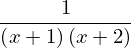

In [26]:
1/( (x + 2)*(x + 1) )

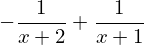

In [27]:
apart(1/( (x + 2)*(x + 1) ), x)

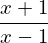

In [28]:
(x + 1)/(x - 1)

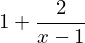

In [29]:
apart((x + 1)/(x - 1), x)

Чтобы снова привести дробь к общему знаменателю используется функция together(expr, x):

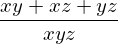

In [30]:
from sympy import together
together(1/x + 1/y + 1/z)

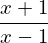

In [31]:
together(apart((x + 1)/(x - 1), x), x)

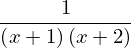

In [32]:
together(apart(1/( (x + 2)*(x + 1) ), x), x)

# Вычисления
## Пределы
Пределы считаются в SymPy очень легко. Чтобы вычислить предел функции, используйте функцию limit(function, variable, point). Например, чтобы вычислить предел f(x) при x -> 0, вам нужно ввести limit(f, x, 0):

In [33]:
from sympy import limit, Symbol, sin, oo
x = Symbol("x")
limit(sin(x)/x, x, 0)

также вы можете вычислять пределы при x, стремящемся к бесконечности:

In [34]:
limit(x, x, oo)

In [35]:
limit(1/x, x, oo)

In [36]:
limit(x**x, x, 0)

 Для более сложных примеров вычисления пределов, вы можете обратится к файлу с тестами: https://github.com/sympy/sympy/blob/master/sympy/series/tests/test_demidovich.py

# Дифференцирование
Продифференцировать любое выражение SymPy, можно используя diff(func, var). Примеры:

In [37]:
from sympy import diff, Symbol, sin, tan
x = Symbol('x')
diff(sin(x), x)

In [38]:
diff(sin(2*x), x)

In [39]:
diff(tan(x), x)

Можно, кстати, через пределы проверить правильность вычислений производной:

In [40]:
from sympy import limit
from sympy.abc import delta
limit((tan(x + delta) - tan(x))/delta, delta, 0)

Производные более высших порядков можно вычислить, используя дополнительный параметр этой же функции diff(func, var, n):

In [41]:
diff(sin(2*x), x, 1)

In [42]:
diff(sin(2*x), x, 2)

In [43]:
diff(sin(2*x), x, 3)

# Разложение в ряд
Для разложения в ряд используйте метод .series(var, point, order):

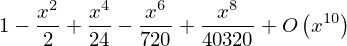

In [44]:
from sympy import Symbol, cos
x = Symbol('x')
cos(x).series(x, 0, 10)

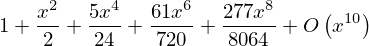

In [45]:
(1/cos(x)).series(x, 0, 10)

Еще один простой пример:

# Суммирование

Имеется возможность вычислять сумму функции f относительно заданной переменной суммирования в заданных пределах.  summation(f, (i, a, b)) вычисляет сумму f относительно i от a до b, т.е.

$summation(f, (i, a, b)) = \sum\limits_{i=a}^b f $

In [48]:
from sympy import summation, oo, symbols, log
i, n, m = symbols('i n m', integer=True)
summation(2*i - 1, (i, 1, n))

In [49]:
summation(1/2**i, (i, 0, oo))

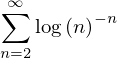

In [50]:
summation(1/log(n)**n, (n, 2, oo))

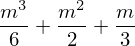

In [51]:
summation(i, (i, 0, n), (n, 0, m))

In [52]:
from sympy.abc import x
from sympy import factorial
summation(x**n/factorial(n), (n, 0, oo))

# Интегрирование
SymPy поддерживает вычисление определенных и неопределенных интегралов с помощью функции integrate(). Она использует расширенный алгоритм Риша-Нормана и некоторые шаблоны и эвристики. Можно вычислять интегралы трансцендентных, простых и специальных функций:

In [53]:
from sympy import integrate, erf, exp, sin, log, oo, pi, sinh, symbols
x, y = symbols('x,y')

Вы можете интегрировать простейшие функции:

In [54]:
integrate(6*x**5, x)

In [55]:
integrate(sin(x), x)

In [56]:
integrate(log(x), x)

In [57]:
integrate(2*x + sinh(x), x)

Примеры интегрирования некоторых специальных функций:

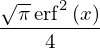

In [58]:
integrate(exp(-x**2)*erf(x), x)

Возможно также вычислить определенный интеграл:

In [59]:
integrate(x**3, (x, -1, 1))

In [60]:
integrate(sin(x), (x, 0, pi/2))

In [61]:
integrate(cos(x), (x, -pi/2, pi/2))

Поддерживаются и несобственные интегралы:

In [62]:
integrate(exp(-x), (x, 0, oo))